In [1]:
# Exploratory analysis on the data

import pandas as pd
from pandas import Series,DataFrame

import numpy as np
from scipy.stats import linregress

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
%pylab inline
%matplotlib inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Get Data
results = pd.read_csv('primary_results.csv',header=0)
counties = pd.read_csv('county_facts.csv',header=0)

#print len(counties) #check = 52 fewer - yes!
counties = counties.dropna(subset=["state"]) #remove USA, DC, and 50 have state observations

# Preprocessing
def county_c(s):
    st = counties["county"][s].split()[:-1]
    return " ".join(st)

counties["county_c"] = counties.index.map(county_c)
counties["county_state"] = counties["county_c"]+"_"+counties["state"]
results["county_state"] = results["county"]+"_"+results["state"]

# Merging
primary_demo = pd.merge(results,counties,on='id').dropna()
primary_demo["id"] = primary_demo["id"].astype(int) # converting float to int
primary_demo[:10]

,state_x,county_x,id,party,candidate,votes,fraction_votes,county_state_x,county_y,state_y,...,shipments,wholesale,retail,retail_pc,services_sales,permits,area,pop_sq,county_c,county_state_y
0,AL,Autauga,1001,Democrat,Bernie Sanders,544,0.182,Autauga_AL,Autauga County,AL,...,0,0,598175,12003,88157,131,594.44,91.8,Autauga,Autauga_AL
1,AL,Autauga,1001,Democrat,Hillary Clinton,2387,0.800,Autauga_AL,Autauga County,AL,...,0,0,598175,12003,88157,131,594.44,91.8,Autauga,Autauga_AL
2,AL,Autauga,1001,Republican,Ben Carson,1764,0.146,Autauga_AL,Autauga County,AL,...,0,0,598175,12003,88157,131,594.44,91.8,Autauga,Autauga_AL
3,AL,Autauga,1001,Republican,Donald Trump,5387,0.445,Autauga_AL,Autauga County,AL,...,0,0,598175,12003,88157,131,594.44,91.8,Autauga,Autauga_AL
4,AL,Autauga,1001,Republican,John Kasich,421,0.035,Autauga_AL,Autauga County,AL,...,0,0,598175,12003,88157,131,594.44,91.8,Autauga,Autauga_AL
5,AL,Autauga,1001,Republican,Marco Rubio,1785,0.148,Autauga_AL,Autauga County,AL,...,0,0,598175,12003,88157,131,594.44,91.8,Autauga,Autauga_AL
6,AL,Autauga,1001,Republican,Ted Cruz,2482,0.205,Autauga_AL,Autauga County,AL,...,0,0,598175,12003,88157,131,594.44,91.8,Autauga,Autauga_AL
7,AL,Baldwin,1003,Democrat,Bernie Sanders,2694,0.329,Baldwin_AL,Baldwin County,AL,...,1410273,0,2966489,17166,436955,1384,1589.78,114.6,Baldwin,Baldwin_AL
8,AL,Baldwin,1003,Democrat,Hillary Clinton,5290,0.647,Baldwin_AL,Baldwin County,AL,...,1410273,0,2966489,17166,436955,1384,1589.78,114.6,Baldwin,Baldwin_AL
9,AL,Baldwin,1003,Republican,Ben Carson,4221,0.084,Baldwin_AL,Baldwin County,AL,...,1410273,0,2966489,17166,436955,1384,1589.78,114.6,Baldwin,Baldwin_AL


In [8]:
# Finding winner in each county
idx = primary_demo.groupby(['county_state_x','party'])['fraction_votes'].idxmax()

# Taking only required rows
primary_results_win = primary_demo.loc[idx, ['county_state_x','party','candidate','votes','fraction_votes','pop','age_18','age_65','female','white','black', 'native', 'asian','hispanic', 'white_alone','foreigner', 'bilingual',
       'high_school', 'undergrad', 'veteran','income', 'poverty','area']]
primary_results_win_500 = primary_results_win[primary_results_win['votes']>=500]
primary_results_win_500[:25]

# Calculating average of demographics
candidate_mean = primary_results_win_500.groupby(["candidate","party"])["pop",'age_18','age_65','female','white','black', 'native', 'asian','hispanic', 'white_alone','foreigner', 'bilingual',
       'high_school', 'undergrad', 'veteran','income', 'poverty','area'].agg(['mean'])
candidate_mean.columns = candidate_mean.columns.get_level_values(0)
candidate_mean = candidate_mean.reset_index()
candidate_mean

# Splitting by democrat and republican
democrat_mean = candidate_mean[candidate_mean["party"] == "Democrat"]
republican_mean = candidate_mean[candidate_mean["party"] == "Republican"]
print(democrat_mean)
print(republican_mean)

# Checking no of counties won
primary_results_win_500["candidate"].value_counts()

         candidate     party     pop     age_18     age_65     female  \
0   Bernie Sanders  Democrat   89424  22.003738  17.089987  50.003605   
2  Hillary Clinton  Democrat  179990  22.877740  16.485702  50.553082   

       white      black    native     asian   hispanic  white_alone  \
0  90.617623   2.982911  2.481709  1.479439   5.652737    85.793591   
2  76.075257  19.090240  1.122260  1.846832  10.697603    66.551284   

   foreigner  bilingual  high_school  undergrad       veteran        income  \
0   3.499466   6.667023    86.779306  20.978905   6614.041389  46677.930574   
2   5.659418  11.129452    82.184932  19.888014  11522.946062  45673.361301   

     poverty        area  
0  16.015354  891.307223  
2  18.469435  800.759135  
      candidate       party     pop     age_18     age_65     female  \
1  Donald Trump  Republican  120788  22.025675  17.754769  50.199700   
3   John Kasich  Republican  204381  23.105172  15.851724  50.518966   
4   Marco Rubio  Republican  32

Donald Trump       1667
Hillary Clinton    1168
Bernie Sanders      749
Ted Cruz            448
John Kasich          58
Marco Rubio          38
Name: candidate, dtype: int64

Democrat:
Hilary Vs Sanders - female(equal),white_alone(Favours Bernie),black(Huge Hilary favour),bilingual(Hilary favour),veteran(Hilary!)

Republican:
Trump Vs. Kasich Vs. Rubio Vs. Cruz - white_alone (Kasich! - few counties, Trump in second), black(Rubio favour), bilingual (low for Trump), undergrad/high school (low for Trump), veteran,income (low for trump), poverty(high)

The main takeaway however is that based on the data, Donald Trump has had a much broader appeal than his main rivals, at least among Republican primary voters. Whether that would translate into a larger appeal among the general population is hard to gauge. 

F:\Users\Arjun\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


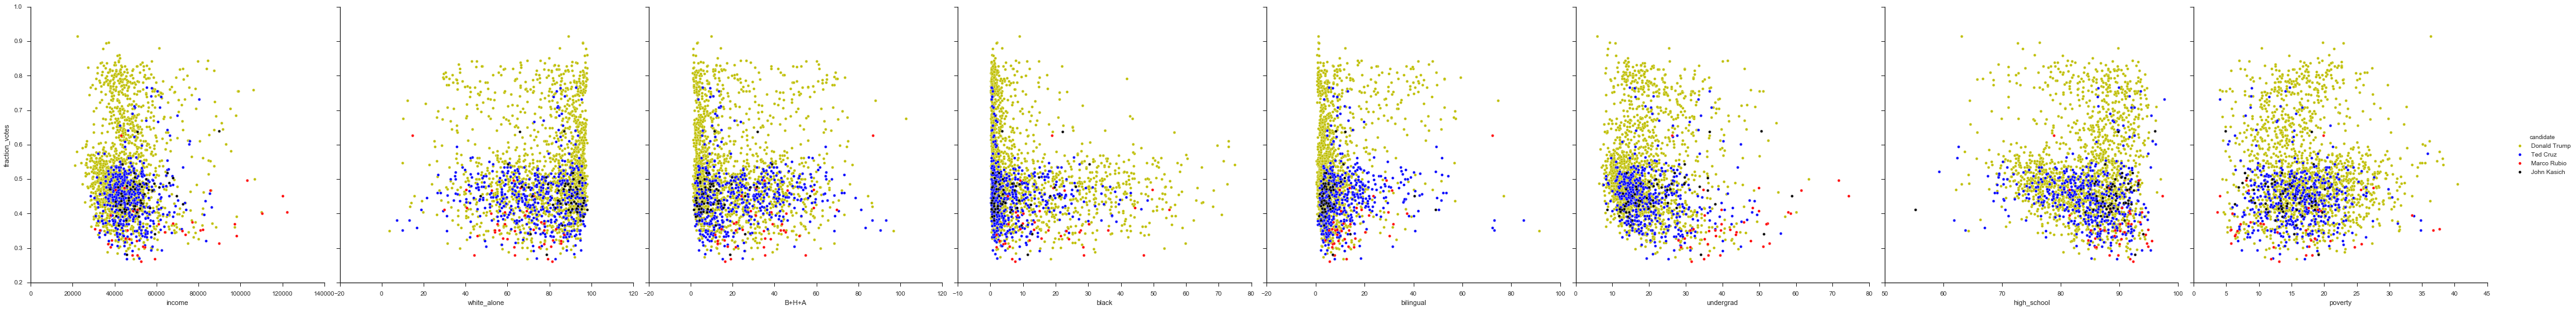

In [24]:
republican = primary_results_win_500[primary_results_win_500["party"]=="Republican"]
republican["B+H+A"] = republican["black"]+republican["hispanic"]+republican["asian"]

sns.pairplot(republican, hue="candidate", 
             x_vars = ["income","white_alone","B+H+A","black","bilingual","undergrad","high_school","poverty"], 
             y_vars = ["fraction_votes"],size=7,palette={"y","b","r","black"})

F:\Users\Arjun\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


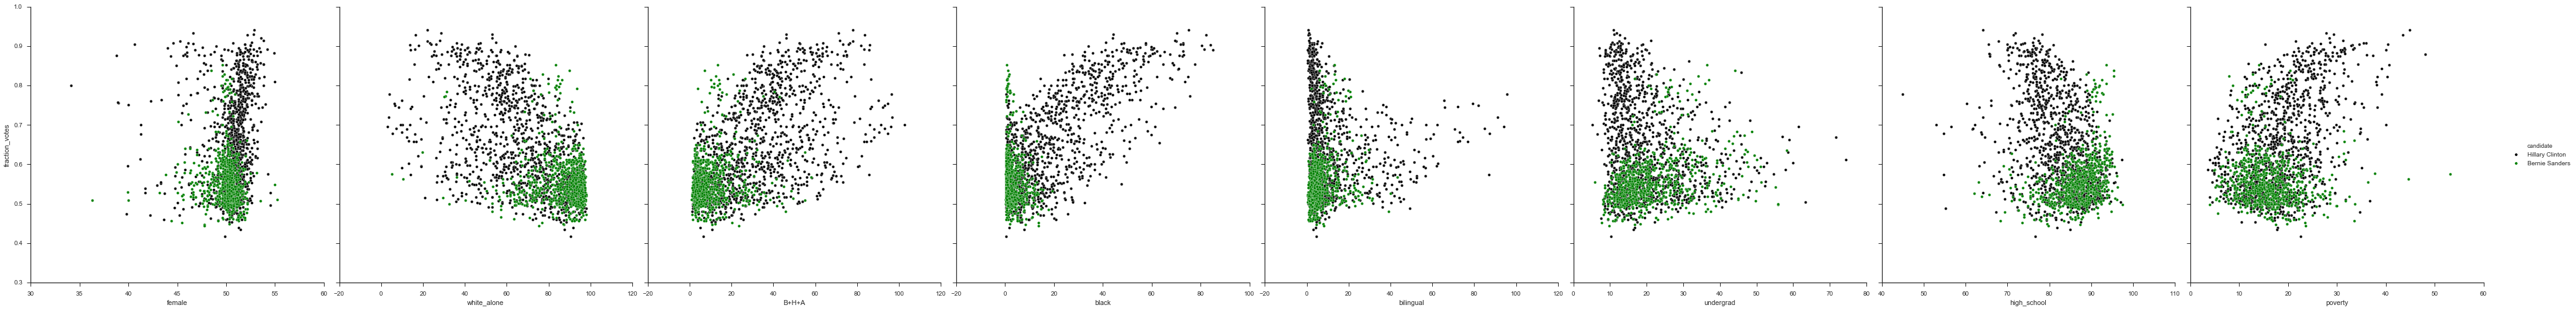

In [25]:
democrat = primary_results_win_500[primary_results_win_500["party"]=="Democrat"]
democrat["B+H+A"] = democrat["black"]+democrat["hispanic"]+democrat["asian"]

sns.pairplot(democrat, hue="candidate", 
             x_vars = ["female","white_alone","B+H+A","black","bilingual","undergrad","high_school","poverty"], 
             y_vars = ["fraction_votes"],size=7,palette={"black","g"})

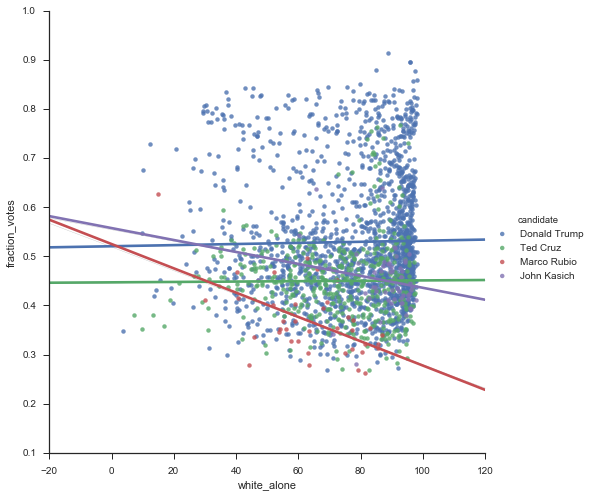

In [6]:
sns.lmplot(x="white_alone", y="fraction_votes", data=republican, hue="candidate", ci=False, size=7,
              legend_out=True)

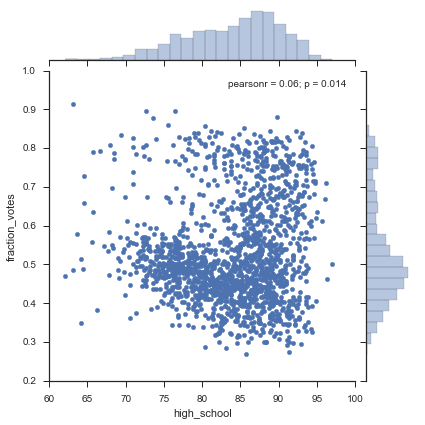

In [7]:
trump = primary_results_win_500[primary_results_win_500["candidate"]=="Donald Trump"]

sns.jointplot(x='high_school',y='fraction_votes',data=trump,kind='scatter')

In [ ]:
vect_tfidf = TfidfVectorizer(stop_words='english')
X_train['TFIDF'] = vect_tfidf.fit_transform(news_train.data)
X_test['TFIDF'] = vect_tfidf.transform(news_test.data)
